   Temperature  Wind Speed   Humidity    Rainfall     Pressure
0    31.236204   87.116857  46.955278   47.116193  1038.895306
1    48.521429   79.045747  57.520595   28.652630   981.571342
2    41.959818   52.655542  35.952930   41.381760   955.190970
3    37.959755   73.981899  56.810222  142.046819  1041.974403
4    24.680559   54.764495  42.184881  265.360207   993.626078
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Temperature  100000 non-null  float64
 1   Wind Speed   100000 non-null  float64
 2   Humidity     100000 non-null  float64
 3   Rainfall     100000 non-null  float64
 4   Pressure     100000 non-null  float64
dtypes: float64(5)
memory usage: 3.8 MB
None
       Temperature  Wind Speed   Humidity    Rainfall     Pressure
0        31.236204   87.116857  46.955278   47.116193  1038.895306
1        48.521429   79.045747  5

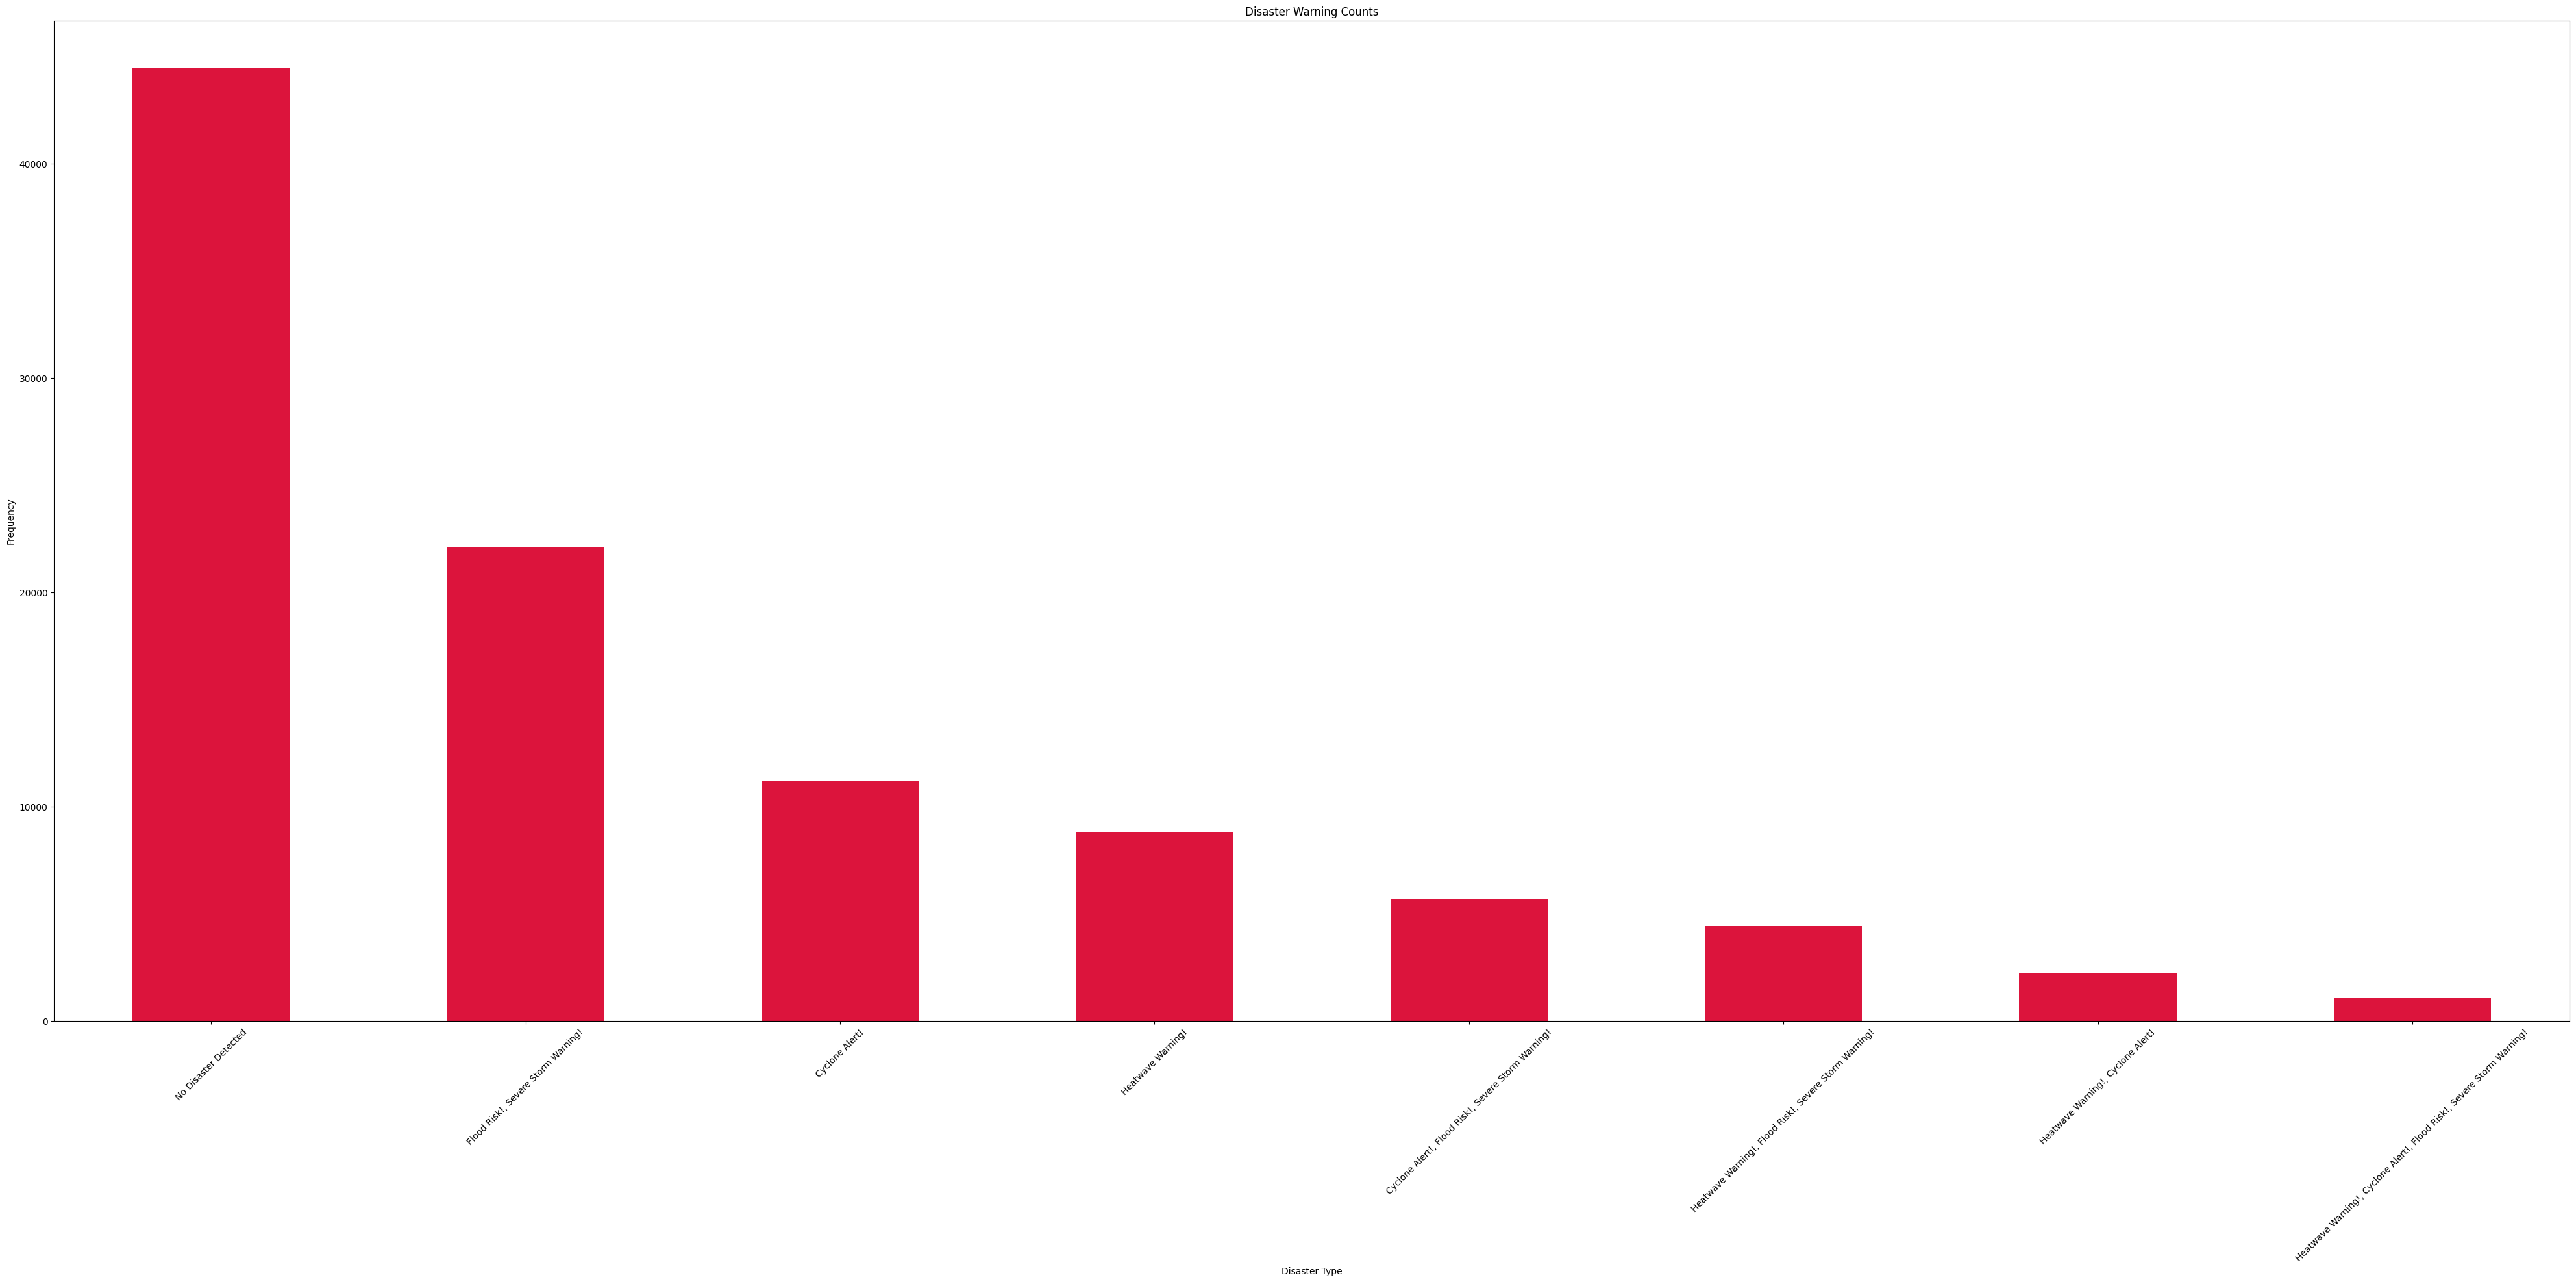

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def ai_guardian_angels(weather_data):
    """
    Predict potential disasters based on given weather parameters.
    Input: DataFrame with columns - Temperature, Wind Speed, Humidity, Rainfall, Pressure
    Output: Warnings if thresholds are exceeded
    """
    warnings = []

    # Define threshold values for disasters
    thresholds = {
        "Heatwave": {"Temperature": 45},  # Temp above 45°C
        "Cyclone": {"Wind_Speed": 120},  # Wind speed above 120 km/h
        "Flood": {"Rainfall": 200},  # Rainfall above 200mm in 24 hours
        "Storm": {"Pressure": 980, "Wind_Speed": 80},  # Low pressure & high wind
    }

    # Check weather conditions against thresholds
    for index, row in weather_data.iterrows():
        alerts = []

        if row["Temperature"] >= thresholds["Heatwave"]["Temperature"]:
            alerts.append("Heatwave Warning!")
        if row["Wind Speed"] >= thresholds["Cyclone"]["Wind_Speed"]:
            alerts.append("Cyclone Alert!")
        if row["Rainfall"] >= thresholds["Flood"]["Rainfall"]:
            alerts.append("Flood Risk!")
       # if row["Pressure"] <= thresholds["Storm"]["Pressure"] and row["Wind_Speed"] >= thresholds["Storm"]["Wind_Speed"]:
            alerts.append("Severe Storm Warning!")

        warnings.append(", ".join(alerts) if alerts else "No Disaster Detected")

    weather_data["Disaster Warning"] = warnings
    return weather_data

# Load dataset
weather_df = pd.read_csv("large_synthetic_disaster_data.csv")

# Show basic details
print(weather_df.head())
print(weather_df.info())

# Drop irrelevant columns (modify based on dataset)
weather_df = weather_df[['Temperature', 'Wind Speed', 'Humidity', 'Rainfall', 'Pressure']]


# Handle missing values by filling with mean values
weather_df.fillna(weather_df.mean(), inplace=True)

# Rename columns if needed
weather_df.rename(columns={"Temperature": "Temperature", "Wind_Speed": "Wind Speed",
                           "Rainfall": "Rainfall", "Pressure": "Pressure"}, inplace=True)

# Verify changes
print(weather_df)

result_df = ai_guardian_angels(weather_df)

# Save predictions
result_df.to_csv("disaster_predictions.csv", index=False)

# Display results
print(result_df.head())

# Count occurrences of each disaster type
disaster_counts = result_df["Disaster Warning"].value_counts()

# Plot disaster occurrences
plt.figure(figsize=(50,20))
disaster_counts.plot(kind='bar', color='crimson')
plt.title("Disaster Warning Counts")
plt.xlabel("Disaster Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()
